## Imports

In [33]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

## Connect

In [34]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

## create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
## do not take project1 into account for calculations of the average difference and the number of commits
## take the number of commits from the checker table

In [47]:
df = pd.io.sql.read_sql(
    """
    select avg_diff, pageviews, num_commits
    from
    (
        select uid, avg(cast((julianday(test.first_commit_ts) - julianday(datetime(deadlines.deadlines, 'unixepoch'))) * 24 as integer)) as avg_diff
        from test left join deadlines on test.labname = deadlines.labs
        where not test.labname = 'project1'
        group by uid
    ) as diff left join
    (
        select uid, count(*) as pageviews
        from pageviews
        group by uid
    ) as views on diff.uid = views.uid left join
    (
        select uid, count(*) as num_commits
        from checker
        group by uid
    ) as commits on diff.uid = commits.uid
    """,
    connect
)
df

,avg_diff,pageviews,num_commits
0,-64.400000,28,84
1,-74.800000,89,137
2,-159.000000,143,259
3,-61.600000,47,62
4,-5.666667,3,66
5,-98.750000,16,176
6,-95.500000,10,83
7,-92.600000,179,233
8,-86.400000,149,114
9,-105.400000,317,134


## the figsize is still the same, you can choose whatever fontsize you like as well as the color palette
## the size of the dots should be 200
## the width of the lines of the diagonal graphs (kde) should be 3

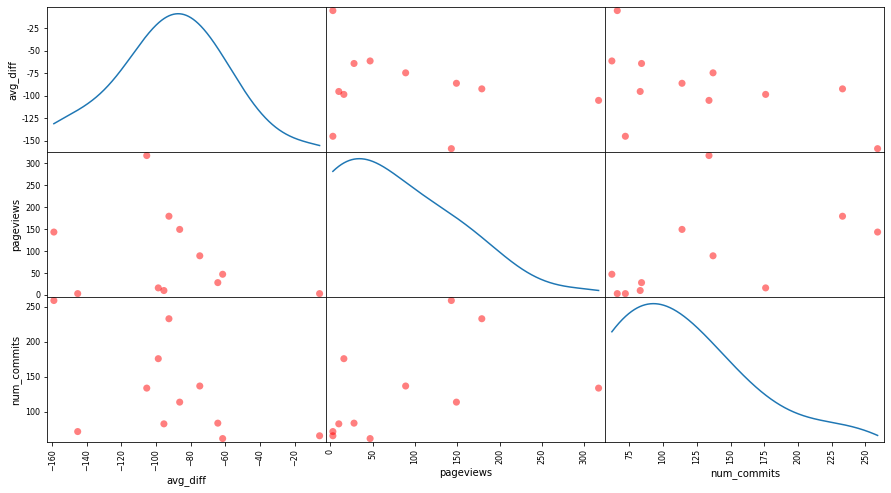

In [48]:
ax = scatter_matrix(df,
                    figsize=(15, 8),
                    diagonal='kde',
                    s=200,
                    color='red')

## Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

## Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

## Can we say that there are many users with a low number of commits and a few with a high number of commits?

## Can we say that there are many users with a small average difference and a few with a large average difference